In [8]:
from pyEDM import *
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import seaborn as sns
from scipy import stats
from tqdm import tqdm
import xarray as xr


In [2]:
mean_dek_ndvi_table = pd.read_csv('/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/observations_tables/mean_dek_ndvi_table.csv', index_col = [0])

In [3]:
mean_dek_ndvi_table

,2002-07-01,2002-07-11,2002-07-21,2002-08-01,2002-08-11,2002-08-21,2002-09-01,2002-09-11,2002-09-21,2002-10-01,...,2019-01-21,2019-02-01,2019-02-11,2019-02-21,2019-03-01,2019-03-11,2019-03-21,2019-04-01,2019-04-11,2019-04-21
0,0.093569,0.093548,0.093231,0.093482,0.093902,0.095308,0.095737,0.094952,0.094271,0.091093,...,0.089993,0.090922,0.091547,0.092245,0.092090,0.092054,0.092080,0.092534,0.093154,0.093862
1,0.094535,0.094518,0.094264,0.093765,0.093862,0.094512,0.095227,0.094836,0.094610,0.093392,...,0.090912,0.091895,0.092665,0.093321,0.093054,0.093177,0.093291,0.093818,0.094213,0.094327
2,0.095122,0.095095,0.094974,0.094281,0.094396,0.094807,0.095511,0.095086,0.094837,0.093881,...,0.091201,0.092223,0.093120,0.093688,0.093283,0.093645,0.094152,0.094746,0.095134,0.094910
3,0.094906,0.094849,0.094647,0.094075,0.093887,0.094402,0.095251,0.094900,0.094868,0.094094,...,0.090580,0.091573,0.092571,0.093365,0.093085,0.093651,0.094054,0.094543,0.094913,0.094734
4,0.095384,0.095278,0.095432,0.094983,0.094913,0.095234,0.095932,0.095231,0.095299,0.094623,...,0.091712,0.092508,0.093630,0.094373,0.093626,0.094272,0.094980,0.095534,0.095607,0.095372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ndvi_table_origT = pd.read_csv('/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/observations_tables/ndvi_table_origT.csv', index_col= [0])

In [ ]:
ndvi_table_origT = (ndvi_table_origT-100)/100

In [ ]:
ndvi_table_origT 

In [15]:
def generate_dekads(start, end):
    '''
    Generates list of timestamps of dekads between two dates
    
    Parameters
    ----------
    start : pd.datetime object
        Start date of list
    end : pd.datetime object
        end date of list
    '''
    
    dtrange = pd.date_range(start, end)
    days = list(range(len(dtrange))) #length of dtrange
    daysDF = pd.DataFrame({'Days': days}, index=dtrange)
    d = daysDF.index.day - np.clip((daysDF.index.day-1) // 10, 0, 2)*10 - 1 
    dekaddates = daysDF.index.values - np.array(d, dtype="timedelta64[D]")
    dekads = daysDF.groupby(dekaddates).mean()
    dekads = dekads.index
    
    return dekads

In [22]:
start = pd.datetime(2002,7,1)
end = pd.datetime(2019,4,30)

dekads = generate_dekads(start, end)
dekads_list = dekads.strftime("%Y-%m-%d").tolist()

In [ ]:
ndvi_table_origT.columns = dekads

In [11]:
#ndvi_table = ndvi_table_origT.T.reset_index(drop=True)

In [12]:
#m_dek_ndvi_table = mean_dek_ndvi_table.T.reset_index(drop=True)

In [10]:
lc_pixels_skill = pd.read_csv('/home/rgreen/DroughtEDM/Data/LCs_pixels/lc_pixels_skill.csv',index_col=[0])

In [11]:
lc_pixel_ids = lc_pixels_skill.pixel_id.tolist()

In [12]:
ndvi_table_lct = ndvi_table_origT.loc[lc_pixel_ids]

In [13]:
ndvi_table_lct.insert(0, 'lc', list(lc_pixels_skill.LC))

In [14]:
mean_dek_ndvi_table_lct = mean_dek_ndvi_table.loc[lc_pixel_ids]

In [15]:
mean_dek_ndvi_table_lct.insert(0, 'lc', list(lc_pixels_skill.LC))

In [ ]:
ndvi_table_lct_crop_rain = ndvi_table_lct.loc[ndvi_table_lct['lc'] == 'cropland_rainfed'].drop(['lc'], axis = 1)
mean_dek_ndvi_table_lct_crop_rain = mean_dek_ndvi_table_lct.loc[mean_dek_ndvi_table_lct['lc'] == 'cropland_rainfed'].drop(['lc'], axis = 1)

ndvi_table_lct_crop_irr = ndvi_table_lct.loc[ndvi_table_lct['lc'] == 'cropland_irrigated'].drop(['lc'], axis = 1)
mean_dek_ndvi_table_lct_crop_irr = mean_dek_ndvi_table_lct.loc[mean_dek_ndvi_table_lct['lc'] == 'cropland_irrigated'].drop(['lc'], axis = 1)

ndvi_table_lct_woodland = ndvi_table_lct.loc[ndvi_table_lct['lc'] == 'woodland'].drop(['lc'], axis = 1)
mean_dek_ndvi_table_lct_woodland = mean_dek_ndvi_table_lct.loc[mean_dek_ndvi_table_lct['lc'] == 'woodland'].drop(['lc'], axis = 1)

ndvi_table_lct_shrubland = ndvi_table_lct.loc[ndvi_table_lct['lc'] == 'shrubland'].drop(['lc'], axis = 1)
mean_dek_ndvi_table_lct_shrubland = mean_dek_ndvi_table_lct.loc[mean_dek_ndvi_table_lct['lc'] == 'shrubland'].drop(['lc'], axis = 1)

ndvi_table_lct_grassland = ndvi_table_lct.loc[ndvi_table_lct['lc'] == 'grassland'].drop(['lc'], axis = 1)
mean_dek_ndvi_table_lct_grassland = mean_dek_ndvi_table_lct.loc[mean_dek_ndvi_table_lct['lc'] == 'grassland'].drop(['lc'], axis = 1)

In [113]:
seasonality_ndvi_crop_rain = (ndvi_table_lct_crop_rain).corrwith((mean_dek_ndvi_table_lct_crop_rain), axis = 1)

In [129]:
seasonality_ndvi_crop_irr = (ndvi_table_lct_crop_irr).corrwith((mean_dek_ndvi_table_lct_crop_irr), axis = 1)

In [122]:
seasonality_ndvi_woodland = (ndvi_table_lct_woodland).corrwith((mean_dek_ndvi_table_lct_woodland), axis = 1)

In [123]:
seasonality_ndvi_shrubland = (ndvi_table_lct_shrubland).corrwith((mean_dek_ndvi_table_lct_shrubland), axis = 1)

In [124]:
seasonality_ndvi_grassland = (ndvi_table_lct_grassland).corrwith((mean_dek_ndvi_table_lct_grassland), axis = 1)

In [304]:
seasonality_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/seasonality/'

In [154]:
seasonality_ndvi_crop_rain.to_csv(seasonality_dir + 'seasonality_ndvi_crop_rain.csv', header = True)

In [153]:
seasonality_ndvi_crop_irr.to_csv(seasonality_dir + 'seasonality_ndvi_crop_irr.csv', header = True)

In [155]:
seasonality_ndvi_woodland.to_csv(seasonality_dir + 'seasonality_ndvi_woodland.csv', header = True)

In [156]:
seasonality_ndvi_grassland.to_csv(seasonality_dir + 'seasonality_ndvi_grassland.csv', header = True)

In [157]:
seasonality_ndvi_shrubland.to_csv(seasonality_dir + 'seasonality_ndvi_shrubland.csv', header = True)

In [308]:
crop_rain_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'cropland_rainfed']['skill']
crop_irr_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'cropland_irrigated']['skill']
woodland_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'woodland']['skill']
shrubland_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'shrubland']['skill']
grassland_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'grassland']['skill']

In [135]:
print(stats.pearsonr(seasonality_ndvi_woodland, woodland_skill))
print(stats.pearsonr(seasonality_ndvi_crop_irr, crop_irr_skill))
print(stats.pearsonr(seasonality_ndvi_crop_rain, crop_rain_skill))
print(stats.pearsonr(seasonality_ndvi_grassland, grassland_skill))
print(stats.pearsonr(seasonality_ndvi_shrubland, shrubland_skill))

(0.8613049521387207, 0.0)
(0.8967541818600498, 0.0)
(0.8826102117272262, 0.0)
(0.8952358304438613, 0.0)
(0.8855136266657007, 0.0)


(0.0, 1.0, 0.0, 1.0)

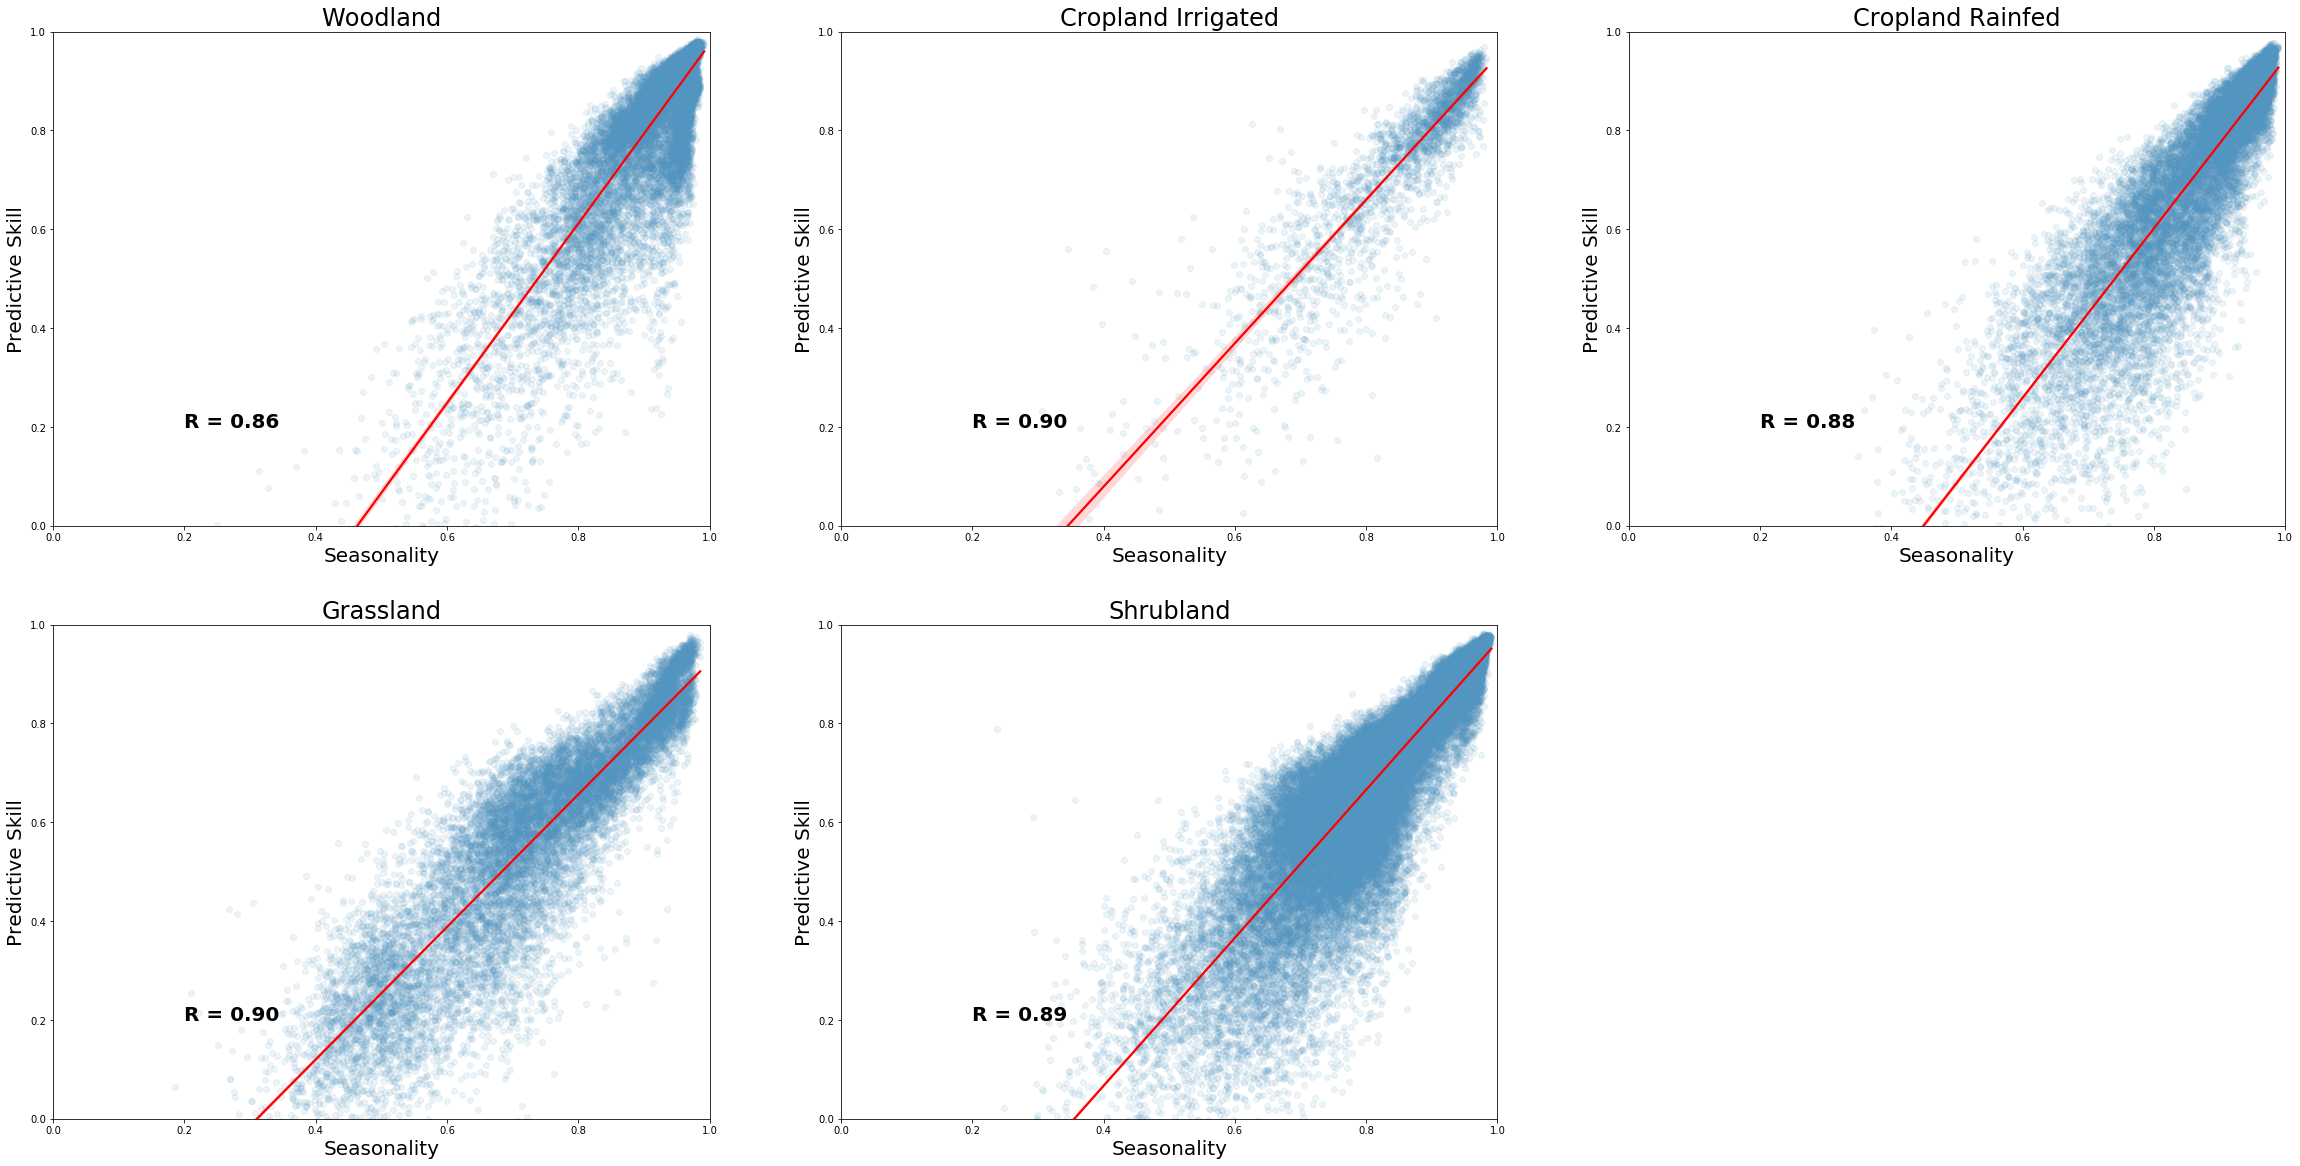

In [137]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (40,20))
sns.regplot(seasonality_ndvi_woodland, woodland_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax1)
ax1.set_xlabel('Seasonality', fontsize = 20)
ax1.set_ylabel('Predictive Skill', fontsize = 20)
ax1.set_xlim([0,1])
ax1.set_ylim([0,1])
ax1.text(0.2, 0.2, "R = 0.86", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax1.set_title('Woodland', fontsize = 24)
sns.regplot(seasonality_ndvi_crop_irr, crop_irr_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax2)
ax2.set_xlabel('Seasonality', fontsize = 20)
ax2.set_ylabel('Predictive Skill', fontsize = 20)
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])
ax2.text(0.2, 0.2, "R = 0.90", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax2.set_title('Cropland Irrigated', fontsize = 24)
sns.regplot(seasonality_ndvi_crop_rain, crop_rain_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax3)
ax3.set_xlabel('Seasonality', fontsize = 20)
ax3.set_ylabel('Predictive Skill', fontsize = 20)
ax3.set_xlim([0,1])
ax3.set_ylim([0,1])
ax3.text(0.2, 0.2, "R = 0.88", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax3.set_title('Cropland Rainfed', fontsize = 24)
sns.regplot(seasonality_ndvi_grassland, grassland_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax4)
ax4.set_xlabel('Seasonality', fontsize = 20)
ax4.set_ylabel('Predictive Skill', fontsize = 20)
ax4.set_xlim([0,1])
ax4.set_ylim([0,1])
ax4.text(0.2, 0.2, "R = 0.90", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax4.set_title('Grassland', fontsize = 24)
sns.regplot(seasonality_ndvi_shrubland, shrubland_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax5)
ax5.set_xlabel('Seasonality', fontsize = 20)
ax5.set_ylabel('Predictive Skill', fontsize = 20)
ax5.set_xlim([0,1])
ax5.set_ylim([0,1])
ax5.text(0.2, 0.2, "R = 0.89", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax5.set_title('Shrubland', fontsize = 24)
ax6.axis('off')

# Contour plot: PI, seasonality, PS

In [2]:
observations_tables = '/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/observations_tables/'

In [3]:
ndvi_anom_table = pd.read_csv(observations_tables+'ndvi_table_anomT.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])


In [4]:
ndvi_anom_tableT = ndvi_anom_table.T

In [5]:
ndvi_anom_tableT.reset_index(drop=True, inplace=True)

In [59]:
ndvi_anom_tableT

,0,1,2,3,4,5,6,7,8,9,...,392932,392933,392934,392935,392936,392937,392938,392939,392940,392941
0,1.101671,1.267218,0.938137,1.100588,1.324199,1.315054,1.165266,1.113739,0.995424,1.331126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.981070,1.093294,0.873698,1.124495,1.246212,1.232029,1.013628,0.881350,0.986223,1.310523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.620074,0.497290,0.323125,0.514614,1.014546,0.785064,0.773919,0.555548,0.556693,0.720380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.039260,0.837557,0.609005,0.773013,1.242413,1.024316,1.137690,0.987828,1.089278,1.286157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.971371,0.751863,0.467435,0.481555,1.118889,0.952852,1.045681,0.991793,0.930235,0.796915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,0.208073,0.026296,-0.284296,0.197938,-0.367827,-0.628079,-0.157488,-0.532811,-0.979176,-0.508893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,0.522922,0.110877,-0.002413,0.636307,-0.054164,-0.157637,0.066254,-0.048598,-0.132028,0.265398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,0.331863,-0.081993,-0.378869,-0.353615,-0.445762,-0.467402,-0.187034,-0.058811,0.460797,0.651812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,0.306670,-0.136034,-0.296636,0.203851,-0.584455,-0.485288,-0.248363,-0.311625,-0.056771,0.484504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
ndvi_anom_tableT.insert(0, 'Time', dekads)

In [74]:
ndvi_anom_tableT.set_index('Time', inplace=True, drop = True)

In [77]:
ndvi_anom_tableT

,0,1,2,3,4,5,6,7,8,9,...,392932,392933,392934,392935,392936,392937,392938,392939,392940,392941
Time,,,,,,,,,,,,,,,,,,,,,
2002-07-01,1.101671,1.267218,0.938137,1.100588,1.324199,1.315054,1.165266,1.113739,0.995424,1.331126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-11,0.981070,1.093294,0.873698,1.124495,1.246212,1.232029,1.013628,0.881350,0.986223,1.310523,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-21,0.620074,0.497290,0.323125,0.514614,1.014546,0.785064,0.773919,0.555548,0.556693,0.720380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-01,1.039260,0.837557,0.609005,0.773013,1.242413,1.024316,1.137690,0.987828,1.089278,1.286157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-11,0.971371,0.751863,0.467435,0.481555,1.118889,0.952852,1.045681,0.991793,0.930235,0.796915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-11,0.208073,0.026296,-0.284296,0.197938,-0.367827,-0.628079,-0.157488,-0.532811,-0.979176,-0.508893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,0.522922,0.110877,-0.002413,0.636307,-0.054164,-0.157637,0.066254,-0.048598,-0.132028,0.265398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01,0.331863,-0.081993,-0.378869,-0.353615,-0.445762,-0.467402,-0.187034,-0.058811,0.460797,0.651812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [430]:
crop_predictions_tables = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/crop_predictions_tables/'

In [431]:
crop_rain_pi1 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi1.csv', index_col=[0])
crop_rain_pi2 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi2.csv', index_col=[0])
crop_rain_pi3 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi3.csv', index_col=[0])
crop_rain_pi4 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi4.csv', index_col=[0])
crop_rain_pi5 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi5.csv', index_col=[0])
crop_rain_pi6 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi6.csv', index_col=[0])
crop_rain_pi7 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi7.csv', index_col=[0])
crop_rain_pi8 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi8.csv', index_col=[0])
crop_rain_pi9 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi9.csv', index_col=[0])
crop_rain_pi10 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi10.csv', index_col=[0])
crop_rain_pi11 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi11.csv', index_col=[0])
crop_rain_pi12 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi12.csv', index_col=[0])
crop_rain_pi13 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi13.csv', index_col=[0])
crop_rain_pi14 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi14.csv', index_col=[0])
crop_rain_pi15 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi15.csv', index_col=[0])
crop_rain_pi16 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi16.csv', index_col=[0])
crop_rain_pi17 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi17.csv', index_col=[0])
crop_rain_pi18 = pd.read_csv(crop_predictions_tables + 'crop_rain_ndvi_ea_simplex_ed6_pi18.csv', index_col=[0])

In [432]:
crop_rain_pi_list = [crop_rain_pi1, crop_rain_pi2, crop_rain_pi3, crop_rain_pi4, crop_rain_pi5, crop_rain_pi6, crop_rain_pi7, crop_rain_pi8,
                    crop_rain_pi9, crop_rain_pi10, crop_rain_pi11, crop_rain_pi12, crop_rain_pi13, crop_rain_pi14, crop_rain_pi15, crop_rain_pi16, 
                    crop_rain_pi17, crop_rain_pi18]

In [472]:
ndvi_crop_rain_seasonality = pd.read_csv(seasonality_dir + 'seasonality_ndvi_crop_rain.csv', index_col = [0])

In [473]:
ndvi_crop_rain_seasonality.columns = ['seasonality']

In [474]:
def bins(row):
    if row['seasonality'] < 0.2:
        val = '0-0.2'
    elif row['seasonality'] < 0.4:
        val = '0.2-0.4'
    elif row['seasonality'] < 0.6:
        val = '0.4-0.6'
    elif row['seasonality'] < 0.8:
        val = '0.6-0.8'
    else:
        val = '0.8-1'
    return val

In [475]:
ndvi_crop_rain_seasonality['seasonality_bin'] = ndvi_crop_rain_seasonality.apply(bins, axis =1)

In [497]:
ndvi_crop_rain_seasonality

,seasonality,seasonality_bin
3681,0.391365,0.2-0.4
41006,0.526155,0.4-0.6
51543,0.605284,0.6-0.8
52208,0.827348,0.8-1
53372,0.728647,0.6-0.8
...,...,...
382709,0.926816,0.8-1
383868,0.883797,0.8-1
383942,0.925603,0.8-1
385086,0.906645,0.8-1


In [476]:
crop_rain_s_0_02 = list(ndvi_crop_rain_seasonality[ndvi_crop_rain_seasonality['seasonality_bin'] == '0-0.2'].index)
crop_rain_s_02_04 = list(ndvi_crop_rain_seasonality[ndvi_crop_rain_seasonality['seasonality_bin'] == '0.2-0.4'].index)
crop_rain_s_04_06 = list(ndvi_crop_rain_seasonality[ndvi_crop_rain_seasonality['seasonality_bin'] == '0.4-0.6'].index)
crop_rain_s_06_08 = list(ndvi_crop_rain_seasonality[ndvi_crop_rain_seasonality['seasonality_bin'] == '0.6-0.8'].index)
crop_rain_s_08_1 = list(ndvi_crop_rain_seasonality[ndvi_crop_rain_seasonality['seasonality_bin'] == '0.8-1'].index)

In [477]:
seasonality_bins = [crop_rain_s_0_02, crop_rain_s_02_04, crop_rain_s_04_06, crop_rain_s_06_08, crop_rain_s_08_1]

In [479]:
lc_pixels_skill = pd.read_csv('/home/rgreen/DroughtEDM/Data/LCs_pixels/lc_pixels_skill.csv',index_col=[0])

In [480]:
crop_rain_pixels = list(lc_pixels_skill[lc_pixels_skill.LC == 'cropland_rainfed']['pixel_id'])

In [438]:
crop_rain_ndvi_anom = ndvi_anom_table.loc[crop_rain_pixels]

In [439]:
def compute_prediction_skill(pi_list, orig_df,):
    
    ps_df = pd.DataFrame({'pixel_id':orig_df.index})
    
    for i in range(1,19):
        print(i)
        pred_df = pi_list[i-1]
        ps_col = pred_df.iloc[:,:-i].corrwith(orig_df.iloc[:,5:], axis = 1)
        ps_df['pi' + str(i) + '_ps'] = list(ps_col)
        
    return ps_df
        

In [440]:
crop_rain_pi_ps = compute_prediction_skill(crop_rain_pi_list,crop_rain_ndvi_anom)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [528]:
crop_rain_pi_ps

,pixel_id,pi1_ps,pi2_ps,pi3_ps,pi4_ps,pi5_ps,pi6_ps,pi7_ps,pi8_ps,pi9_ps,pi10_ps,pi11_ps,pi12_ps,pi13_ps,pi14_ps,pi15_ps,pi16_ps,pi17_ps,pi18_ps
0,3681,0.962118,0.962009,0.919162,0.892181,0.864199,0.835241,0.807607,0.781991,0.757012,0.731456,0.705226,0.678887,0.653303,0.628879,0.605670,0.583054,0.561719,0.539371
1,41006,0.968797,0.968780,0.950355,0.943924,0.937700,0.932262,0.928970,0.927099,0.924128,0.919309,0.912062,0.904166,0.897296,0.893489,0.894019,0.895424,0.896340,0.897000
2,51543,0.960089,0.960140,0.929163,0.919925,0.915780,0.914258,0.913132,0.911348,0.907245,0.901830,0.894700,0.885754,0.876687,0.868636,0.861378,0.855038,0.849773,0.847659
3,52208,0.949290,0.949247,0.898434,0.864187,0.827733,0.791701,0.761004,0.735084,0.719464,0.711499,0.709358,0.710373,0.715203,0.722879,0.731825,0.739122,0.744530,0.746897
4,53372,0.935177,0.935121,0.855682,0.796284,0.743108,0.709582,0.696237,0.693130,0.690411,0.686936,0.680816,0.670645,0.660623,0.651321,0.644341,0.639832,0.643076,0.653824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20815,382709,0.954806,0.954704,0.919112,0.903625,0.893511,0.890459,0.891785,0.892005,0.891287,0.892926,0.895326,0.895024,0.894045,0.891571,0.891733,0.897941,0.906036,0.908608
20816,383868,0.939025,0.939020,0.882464,0.865023,0.854260,0.848079,0.844648,0.840445,0.834222,0.833735,0.837316,0.838799,0.839061,0.838592,0.839705,0.843176,0.848301,0.855453
20817,383942,0.959035,0.958923,0.928070,0.917558,0.910999,0.907490,0.905045,0.900924,0.892895,0.882103,0.873699,0.874051,0.880577,0.888827,0.894603,0.897294,0.897791,0.895794
20818,385086,0.940646,0.940431,0.902549,0.895145,0.889381,0.885177,0.880960,0.873694,0.864649,0.854692,0.850337,0.856519,0.867654,0.876703,0.883176,0.886015,0.885817,0.884212


In [442]:
crop_rain_pi_ps.to_csv('/home/rgreen/DroughtEDM/Data/crop_rain_pi_ps.csv')

In [484]:
def s_ps_df(s_bins, pi_ps_df):
    
    out_df = pd.DataFrame()
    columns = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']
    for i, bin_pixels in enumerate(s_bins):
        print(i)
        if i == 0:
            s_bin_ps = pi_ps_df[pi_ps_df.pixel_id == bin_pixels[0]].mean()
            out_df[i] = list(s_bin_ps)
            #print(s_bin_ps)
        else:
            s_bin_ps = pi_ps_df[pi_ps_df.pixel_id.isin(bin_pixels)].mean()
            out_df[i] = list(s_bin_ps)
            #print(s_bin_ps)
    out_df.columns = columns
    return out_df.loc[1:]

In [485]:
crop_rain_s_ps = s_ps_df(seasonality_bins, crop_rain_pi_ps)

0
1
2
3
4


In [486]:
crop_rain_s_ps

,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
1,0.795442,0.864967,0.873545,0.916226,0.965778
2,0.795442,0.864973,0.873590,0.916255,0.965790
3,0.394807,0.613615,0.628857,0.761421,0.916689
4,0.258023,0.524067,0.525710,0.678274,0.887744
5,0.205891,0.473626,0.452098,0.611633,0.861087
6,0.198379,0.446807,0.406302,0.567965,0.838493
7,0.200484,0.425898,0.382327,0.545468,0.820430
8,0.189376,0.408158,0.373798,0.538718,0.807302
9,0.165219,0.394244,0.373339,0.540558,0.799667
10,0.132149,0.386284,0.375065,0.545378,0.797802


(1, 18)

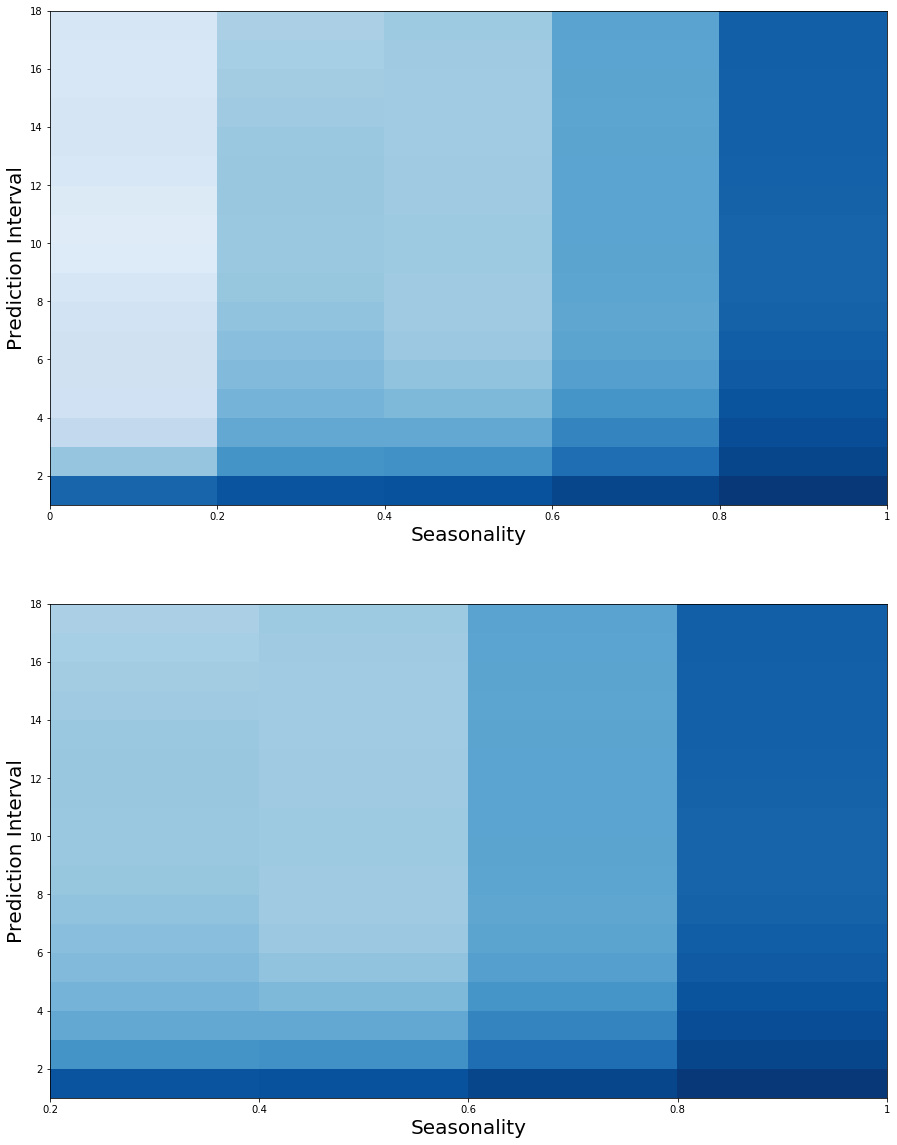

In [251]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (15,20) )
ax1.pcolor(crop_rain_s_ps, vmin = 0, vmax = 1, cmap = 'Blues')
ax1.set_xticks([0,1,2,3,4,5])
ax1.set_xticklabels(['0','0.2','0.4', '0.6', '0.8', '1'])
ax1.set_xlabel('Seasonality', fontsize = 20)
ax1.set_ylabel('Prediction Interval', fontsize = 20)
ax1.set_ylim([1,18])

ax2.pcolor(crop_rain_s_ps.iloc[:,1:], vmin = 0, vmax = 1, cmap = 'Blues')
ax2.set_xticks([0,1,2,3,4])
ax2.set_xticklabels(['0.2','0.4', '0.6', '0.8', '1'])
ax2.set_xlabel('Seasonality', fontsize = 20)
ax2.set_ylabel('Prediction Interval', fontsize = 20)
ax2.set_ylim([1,18])

# Walsh and Lawler Seasonality Index

The seasonality index by Walsh and Lawler (1981) is a convenient way to visualize the regions where precipitation tends to be seasonally concentrated:

$$ SI = \frac{1}{P_A}  \sum_{i=1}^{12} \lvert P_i - \frac{P_A}{12} \rvert$$

It can be interpreted as follows:

    < 0.19         Precipitation  spread  throughout  the  year
    0.20-0.39      Precipitation  spread  throughout  the  year,  but  with  a  definite  wetter  season
    0.40-0.59      Rather  seasonal  with  a  short  drier  season
    0.60-0.79      Seasonal
    0.80-0.99      Markedly  seasonal  with  a  long  dry  season
    1.00-1.19      Most  precipitation in 3  months
    > 1.20         Extreme  seasonality,  with  almost  all  precipitation  in  1–2  months

In [9]:
observations_tables = '/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/observations_tables/'

In [10]:
precip_orig_table = pd.read_csv(observations_tables+'precip_table_origT.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])

In [23]:
precip_data = precip_orig_table.T

In [24]:
precip_data.insert(0, 'dekads', dekads)

In [25]:
precip_data.set_index('dekads', inplace=True)

In [27]:
def calc_rainfall_seasonality(df):
    """Calculates the seasonality index for rainfall as described in 
    Walsh, R. P. D., & Lawler, D. M. (1981). RAINFALL SEASONALITY:
        DESCRIPTION, SPATIAL PATTERNS AND CHANGE THROUGH TIME. 
        Weather, 36(7), 201–208. doi:10.1002/j.1477-8696.1981.tb05400.x 
    """
    seasonality_year_pixel = {}
    for col in tqdm(range(len(df.columns))):
        
        grouped_years = df[col].groupby(df[col].index.year)
        
        rainfall_seasonality_by_year = []
        years = []
        for year, year_df in grouped_years:
            grouper = year_df.index.month
            if len(grouper) == 36:
                years.append(year)
                yearly_sum = year_df.sum()
                monthly_sum = year_df.groupby(grouper).sum()
                
                sum_monthly_derivation = 0
                for month in monthly_sum.index:
                    sum_monthly_derivation += abs(monthly_sum[month] - (yearly_sum/12))
                seasonality_index = sum_monthly_derivation / yearly_sum
                #print(seasonality_index)
            else:
                continue
            
            rainfall_seasonality_by_year.append(seasonality_index)
                #print(rainfall_seasonality_by_year)
        seasonality_year_pixel[col] = rainfall_seasonality_by_year
    return pd.DataFrame(seasonality_year_pixel, index = list(range(2003,2019)))

In [28]:
precip_seasonality_years = calc_rainfall_seasonality(precip_data)

100%|██████████| 392942/392942 [3:12:04<00:00, 34.10it/s]  


In [29]:
precip_seasonality_years

,0,1,2,3,4,5,6,7,8,9,...,392932,392933,392934,392935,392936,392937,392938,392939,392940,392941
2003,0.952945,0.969673,0.979632,0.968645,1.005550,1.010777,1.016131,0.993249,0.981656,0.985937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,0.940827,0.956129,0.950776,0.953954,0.994183,0.997108,1.000419,0.975610,0.972453,0.972389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,0.940827,0.956129,0.950776,0.953954,0.994183,0.997108,1.000419,0.975610,0.972453,0.972389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,0.946476,0.961254,0.955901,0.958373,0.997934,1.017048,1.019042,0.995585,0.976604,0.985195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,0.940827,0.956129,0.950776,0.953954,0.994183,0.997108,1.000419,0.975610,0.972453,0.972389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,0.940827,0.956129,0.950776,0.953954,0.994183,0.997108,1.000419,0.975610,0.972453,0.972389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.940827,0.956129,0.950776,0.953954,0.994183,0.997108,1.009126,0.985273,0.983106,0.983444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,0.940827,0.961020,0.950776,0.953954,0.994183,0.997108,1.000419,0.975610,0.977220,0.972389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,0.940827,0.956129,0.950776,0.953954,0.994183,0.997108,1.000419,0.975610,0.972453,0.972389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,0.952067,0.967521,0.961766,0.965433,1.004594,1.015266,1.017882,0.998025,0.987865,0.986012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
precip_seasonality_years.to_csv('/home/rgreen/DroughtEDM/Data/precip_seasonality_walsh.csv')

In [4]:
precip_seasonality_years

NameError: name 'precip_seasonality_years' is not defined

In [394]:
mean_precip_seasonality_walsh = pd.DataFrame(precip_seasonality_years.mean(axis=0), columns = ['seasonality'])

In [1]:
mean_precip_seasonality_walsh

NameError: name 'mean_precip_seasonality_walsh' is not defined

In [396]:
crop_rain_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'cropland_rainfed']['skill']
crop_irr_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'cropland_irrigated']['skill']
woodland_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'woodland']['skill']
shrubland_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'shrubland']['skill']
grassland_skill = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'grassland']['skill']

In [397]:
mean_precip_walsh_lc = mean_precip_seasonality_walsh.loc[lc_pixel_ids]

In [398]:
mean_precip_walsh_lc.insert(0, 'lc', list(lc_pixels_skill.LC))

In [399]:
mean_precip_walsh_lc.min()

lc             cropland_irrigated
seasonality              0.273181
dtype: object

In [405]:
mean_precip_walsh_lc[mean_precip_walsh_lc.seasonality > 1.2]

,lc,seasonality
2518,cropland_irrigated,1.213081
3098,cropland_irrigated,1.226007
13579,cropland_irrigated,1.374931
17077,cropland_irrigated,1.336076
21158,cropland_irrigated,1.392396
...,...,...
337249,grassland,1.245703
337250,grassland,1.280608
338412,shrubland,1.204886
338413,shrubland,1.201311


In [499]:
precip_walsh_crop_rain_pix = mean_precip_walsh_lc.loc[mean_precip_walsh_lc['lc'] == 'cropland_rainfed'].drop(['lc'], axis = 1)

In [500]:
precip_walsh_crop_rain_pix['seasonality']

3681      0.955207
41006     1.513618
51543     1.252533
52208     0.910588
53372     0.885275
            ...   
382709    1.028946
383868    1.026956
383942    1.035400
385086    1.051510
387421    1.061111
Name: seasonality, Length: 20820, dtype: float64

In [498]:
precip_walsh_woodland = mean_precip_walsh_lc.loc[mean_precip_walsh_lc['lc'] == 'woodland'].drop(['lc'], axis = 1).reset_index(drop=True)
precip_walsh_crop_irr = mean_precip_walsh_lc.loc[mean_precip_walsh_lc['lc'] == 'cropland_irrigated'].drop(['lc'], axis = 1).reset_index(drop=True)
precip_walsh_crop_rain = mean_precip_walsh_lc.loc[mean_precip_walsh_lc['lc'] == 'cropland_rainfed'].drop(['lc'], axis = 1).reset_index(drop=True)
precip_walsh_grassland = mean_precip_walsh_lc.loc[mean_precip_walsh_lc['lc'] == 'grassland'].drop(['lc'], axis = 1).reset_index(drop=True)
precip_walsh_shrubland = mean_precip_walsh_lc.loc[mean_precip_walsh_lc['lc'] == 'shrubland'].drop(['lc'], axis = 1).reset_index(drop=True)

In [348]:
crop_rain_skill_rs = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'cropland_rainfed']['skill'].reset_index(drop=True)
crop_irr_skill_rs = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'cropland_irrigated']['skill'].reset_index(drop=True)
woodland_skill_rs = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'woodland']['skill'].reset_index(drop=True)
shrubland_skill_rs = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'shrubland']['skill'].reset_index(drop=True)
grassland_skill_rs = lc_pixels_skill.loc[lc_pixels_skill['LC'] == 'grassland']['skill'].reset_index(drop=True)

In [390]:
print(stats.pearsonr(precip_walsh_woodland[0], woodland_skill_rs))
print(stats.pearsonr(precip_walsh_crop_irr[0], crop_irr_skill_rs))
print(stats.pearsonr(precip_walsh_crop_rain[0], crop_rain_skill_rs))
print(stats.pearsonr(precip_walsh_grassland[0], grassland_skill_rs))
print(stats.pearsonr(precip_walsh_shrubland[0], shrubland_skill_rs))

(0.474738676918365, 0.0)
(0.3710605858303069, 2.5602404844478325e-85)
(0.617024684025352, 0.0)
(0.39423999477863536, 0.0)
(0.2013028401471349, 0.0)


(0.0, 1.0, 0.0, 1.0)

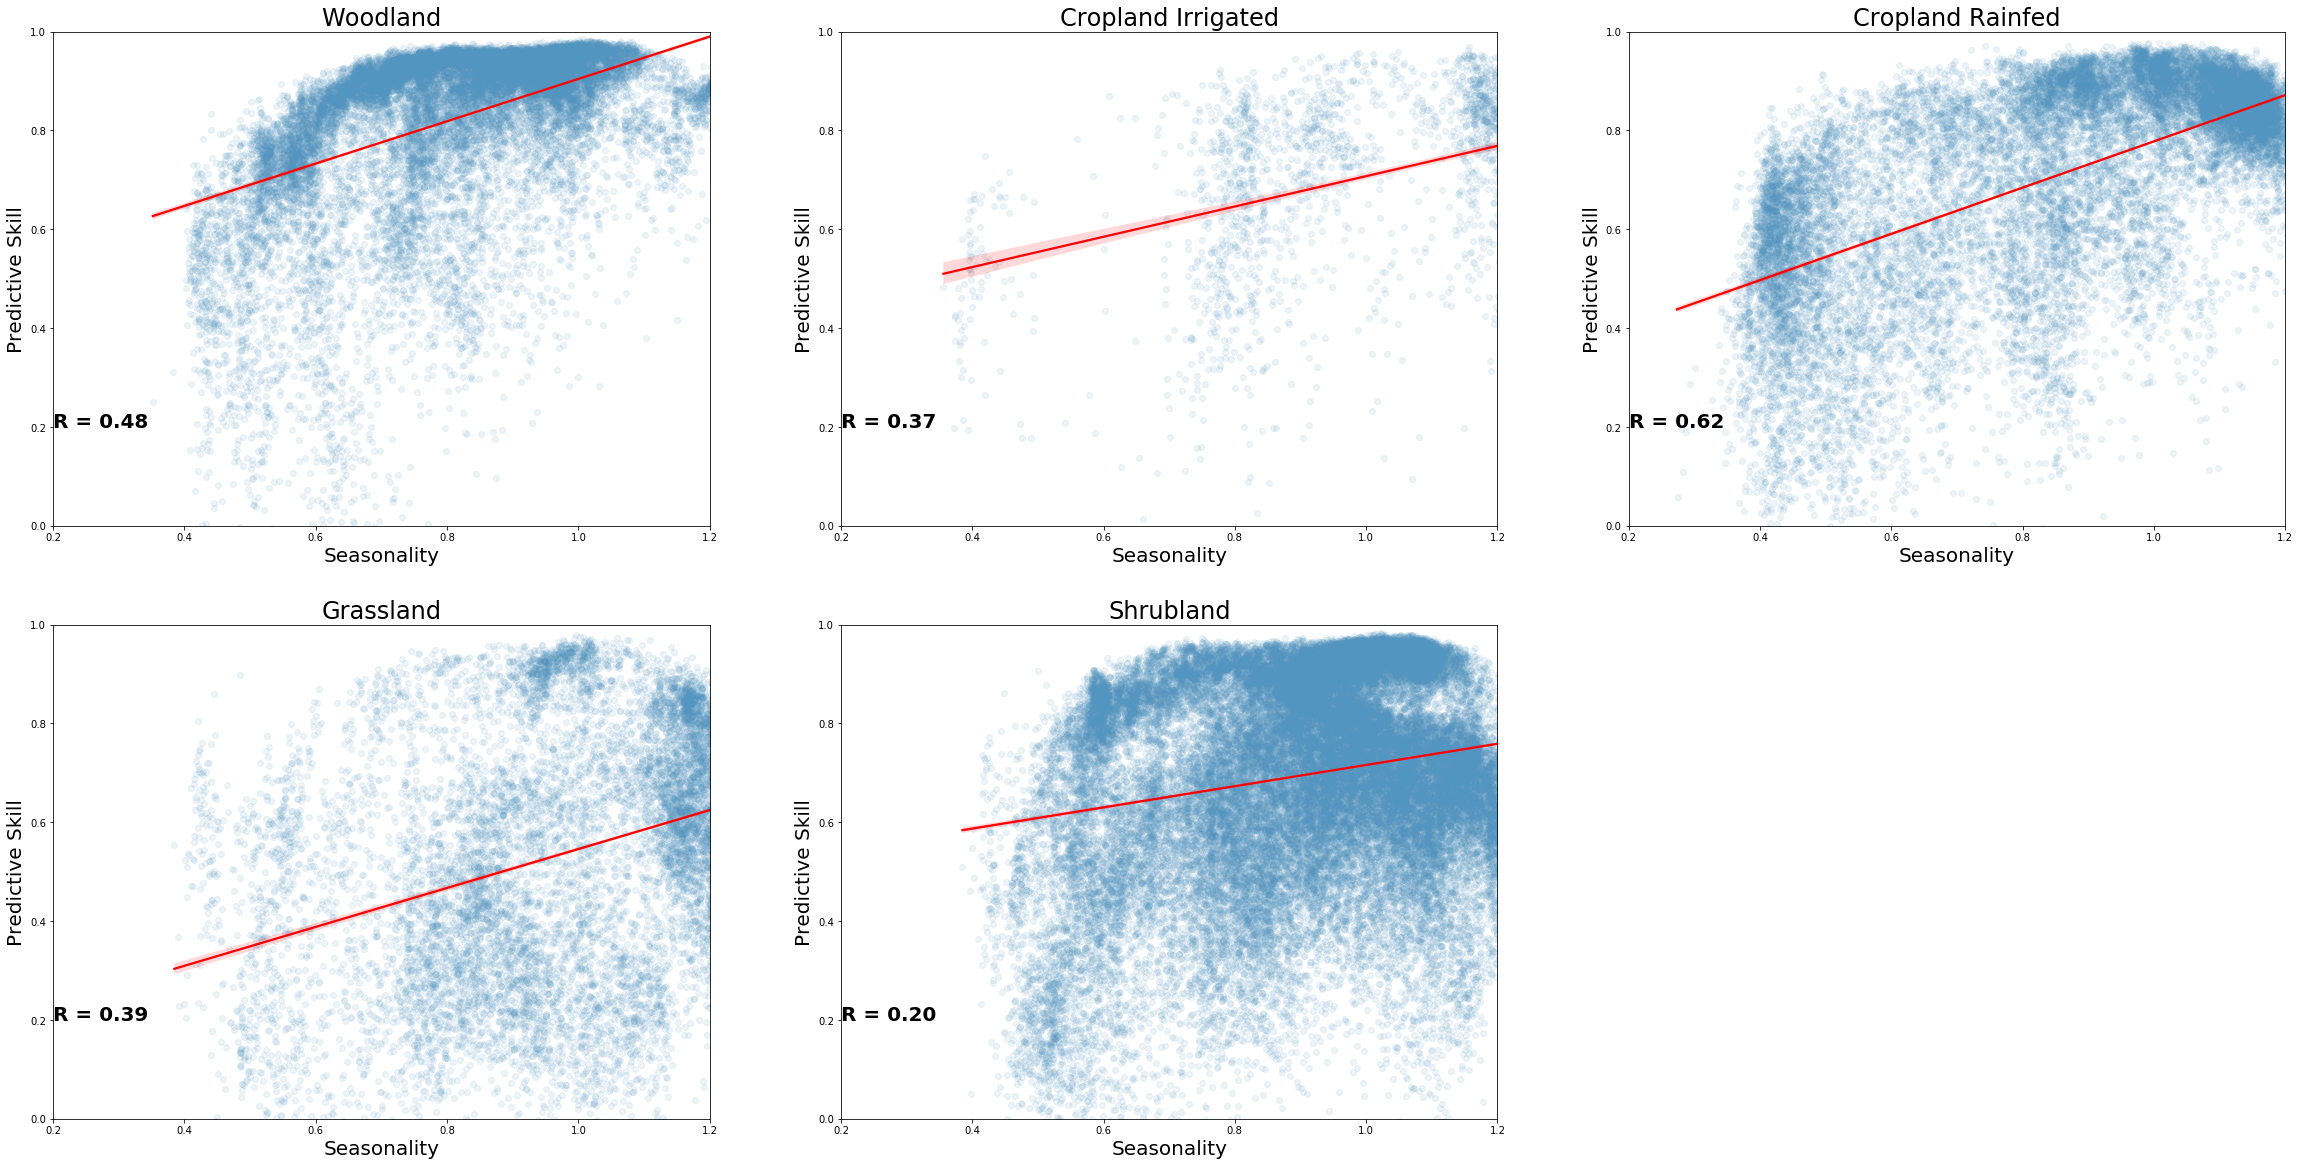

In [522]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize = (40,20))
sns.regplot(precip_walsh_woodland, woodland_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax1)
ax1.set_xlabel('Seasonality', fontsize = 20)
ax1.set_ylabel('Predictive Skill', fontsize = 20)
ax1.set_xlim([0.2,1.2])
ax1.set_ylim([0,1])
ax1.text(0.2, 0.2, "R = 0.48", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax1.set_title('Woodland', fontsize = 24)
sns.regplot(precip_walsh_crop_irr, crop_irr_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax2)
ax2.set_xlabel('Seasonality', fontsize = 20)
ax2.set_ylabel('Predictive Skill', fontsize = 20)
ax2.set_xlim([0.2,1.2])
ax2.set_ylim([0,1])
ax2.text(0.2, 0.2, "R = 0.37", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax2.set_title('Cropland Irrigated', fontsize = 24)
sns.regplot(precip_walsh_crop_rain, crop_rain_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax3)
ax3.set_xlabel('Seasonality', fontsize = 20)
ax3.set_ylabel('Predictive Skill', fontsize = 20)
ax3.set_xlim([0.2,1.2])
ax3.set_ylim([0,1])
ax3.text(0.2, 0.2, "R = 0.62", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax3.set_title('Cropland Rainfed', fontsize = 24)
sns.regplot(precip_walsh_grassland, grassland_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax4)
ax4.set_xlabel('Seasonality', fontsize = 20)
ax4.set_ylabel('Predictive Skill', fontsize = 20)
ax4.set_xlim([0.2,1.2])
ax4.set_ylim([0,1])
ax4.text(0.2, 0.2, "R = 0.39", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax4.set_title('Grassland', fontsize = 24)
sns.regplot(precip_walsh_shrubland, shrubland_skill, scatter_kws={'alpha': 0.1, 'color': '#5395c1'}, line_kws={"color": "red"}, ax = ax5)
ax5.set_xlabel('Seasonality', fontsize = 20)
ax5.set_ylabel('Predictive Skill', fontsize = 20)
ax5.set_xlim([0.2,1.2])
ax5.set_ylim([0,1])
ax5.text(0.2, 0.2, "R = 0.20", horizontalalignment='left', size='medium', color='black', weight='semibold', fontsize = 20)
ax5.set_title('Shrubland', fontsize = 24)
ax6.axis('off')

In [410]:
def walsh_bins(row):
    if row['seasonality'] < 0.19:
        val = '0.00-0.19'
    elif row['seasonality'] < 0.4:
        val = '0.20-0.39'
    elif row['seasonality'] < 0.6:
        val = '0.40-0.59'
    elif row['seasonality'] < 0.8:
        val = '0.60-0.79'
    elif row['seasonality'] < 1:
        val = '0.80-0.99'
    else:
        val = '1.00-1.19'
    return val

In [524]:
precip_walsh_crop_rain['seasonality_bin'] = precip_walsh_crop_rain.apply(walsh_bins, axis =1)

In [525]:
precip_walsh_crop_rain

,seasonality,seasonality_bin
0,0.955207,0.80-0.99
1,1.513618,1.00-1.19
2,1.252533,1.00-1.19
3,0.910588,0.80-0.99
4,0.885275,0.80-0.99
...,...,...
20815,1.028946,1.00-1.19
20816,1.026956,1.00-1.19
20817,1.035400,1.00-1.19
20818,1.051510,1.00-1.19


In [414]:
#crop_rain_ws_0_02 = list(precip_walsh_crop_rain[precip_walsh_crop_rain['seasonality_bin'] == '0.00-0.19'].index)
crop_rain_ws_02_04 = list(precip_walsh_crop_rain[precip_walsh_crop_rain['seasonality_bin'] == '0.20-0.39'].index)
crop_rain_ws_04_06 = list(precip_walsh_crop_rain[precip_walsh_crop_rain['seasonality_bin'] == '0.40-0.59'].index)
crop_rain_ws_06_08 = list(precip_walsh_crop_rain[precip_walsh_crop_rain['seasonality_bin'] == '0.60-0.79'].index)
crop_rain_ws_08_1 = list(precip_walsh_crop_rain[precip_walsh_crop_rain['seasonality_bin'] == '0.80-0.99'].index)
crop_rain_ws_1_12 = list(precip_walsh_crop_rain[precip_walsh_crop_rain['seasonality_bin'] == '1.00-1.19'].index)

In [418]:
walsh_seasonality_bins = [crop_rain_ws_02_04, crop_rain_ws_04_06, crop_rain_ws_06_08, crop_rain_ws_08_1, crop_rain_ws_1_12]

In [462]:
def ws_ps_df(s_bins, pi_ps_df):
    
    out_df = pd.DataFrame()
    columns = ['0.20-0.39', '0.40-0.59', '0.60-0.79', '0.80-0.99', '1.00-1.19']
    for i, bin_pixels in enumerate(s_bins):
        print(i)
        #print(bin_pixels)
        
        s_bin_ps = pi_ps_df[pi_ps_df.index.isin(bin_pixels)].mean()
        out_df[i] = list(s_bin_ps)
            #print(s_bin_ps)
    out_df.columns = columns
    return out_df.loc[1:]

In [465]:
crop_rain_ws_ps

,0.20-0.39,0.40-0.59,0.60-0.79,0.80-0.99,1.00-1.19
1,0.879170,0.924666,0.943708,0.959829,0.970470
2,0.879289,0.924717,0.943736,0.959854,0.970454
3,0.678271,0.793041,0.844619,0.892608,0.931277
4,0.584328,0.723621,0.788451,0.851547,0.909572
5,0.511976,0.665248,0.741228,0.815934,0.889771
6,0.467790,0.621868,0.706094,0.789951,0.872643
7,0.448132,0.592658,0.681053,0.773791,0.858858
8,0.446467,0.575886,0.663491,0.765620,0.849099
9,0.453898,0.568483,0.651861,0.763505,0.843921
10,0.465324,0.567876,0.645304,0.765565,0.843559


(1, 18)

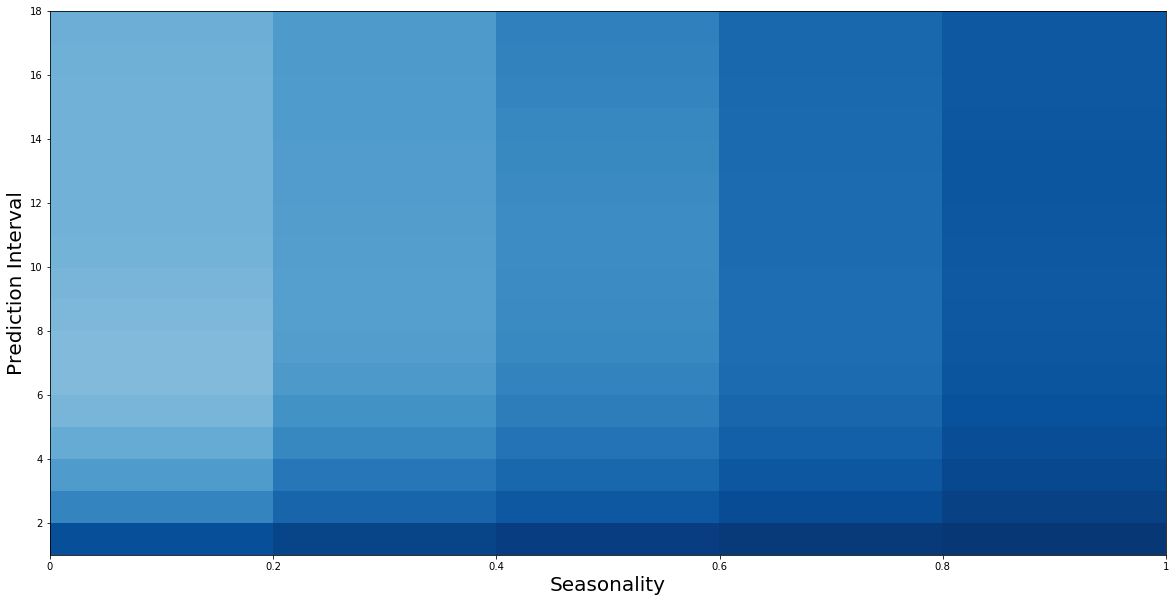

In [512]:
fig, ax1 = plt.subplots(figsize = (20,10) )
ax1.pcolor(crop_rain_ws_ps, vmin = 0, vmax = 1, cmap = 'Blues')
ax1.set_xticks([0,1,2,3,4,5])
ax1.set_xticklabels(['0','0.2','0.4', '0.6', '0.8', '1'])
ax1.set_xlabel('Seasonality', fontsize = 20)
ax1.set_ylabel('Prediction Interval', fontsize = 20)
ax1.set_ylim([1,18])

# ax2.pcolor(crop_rain_ws_ps.iloc[:,1:], vmin = 0, vmax = 1, cmap = 'Blues')
# ax2.set_xticks([0,1,2,3,4])
# ax2.set_xticklabels(['0.2','0.4', '0.6', '0.8', '1'])
# ax2.set_xlabel('Seasonality', fontsize = 20)
# ax2.set_ylabel('Prediction Interval', fontsize = 20)
# ax2.set_ylim([1,18])

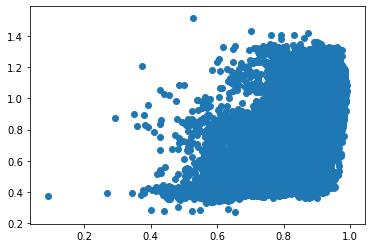

In [502]:
plt.scatter(ndvi_crop_rain_seasonality['seasonality'], precip_walsh_crop_rain_pix['seasonality'])

In [526]:
lc_pixels_skill

,pixel_id,LC,skill
0,863,shrubland,0.660811
1,2046,grassland,0.366358
2,2518,cropland_irrigated,0.495580
3,2629,grassland,0.335566
4,3098,cropland_irrigated,0.407682
...,...,...,...
113170,392068,woodland,0.956308
113171,392069,woodland,0.961195
113172,392646,woodland,0.953059
113173,392648,woodland,0.949436


In [547]:
lc_pixels_skill[(lc_pixels_skill.skill < 0.05) & (lc_pixels_skill.LC == 'cropland_rainfed')]

,pixel_id,LC,skill
21386,124568,cropland_rainfed,-0.027094
59699,184497,cropland_rainfed,-0.010497
61705,187413,cropland_rainfed,0.035974
64419,191514,cropland_rainfed,0.035217
69674,199633,cropland_rainfed,0.026646
...,...,...,...
98868,292234,cropland_rainfed,0.036672
99006,292817,cropland_rainfed,0.046513
99613,295732,cropland_rainfed,0.013995
107537,337317,cropland_rainfed,0.001725


In [553]:
anom_dek_ndvi = pd.read_csv('/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/observations_tables/anom_dek_ndvi_table.csv',index_col = 0)

In [554]:
anom_dek_ndvi

,2002-07-01,2002-07-11,2002-07-21,2002-08-01,2002-08-11,2002-08-21,2002-09-01,2002-09-11,2002-09-21,2002-10-01,...,2019-01-21,2019-02-01,2019-02-11,2019-02-21,2019-03-01,2019-03-11,2019-03-21,2019-04-01,2019-04-11,2019-04-21
0,0.002090,0.001620,0.000468,0.001923,0.001227,0.000825,0.000785,-0.000276,-0.001317,-0.003671,...,0.001398,0.002725,0.000848,-0.000710,0.002701,-0.000029,0.001225,-0.000006,-0.000729,-0.000844
1,0.001719,0.001222,-0.000280,0.001222,0.000873,0.001112,0.001114,-0.000642,-0.000597,-0.003074,...,-0.000021,0.002017,0.003064,0.001025,0.001589,-0.000582,-0.000446,-0.001541,-0.002096,-0.002106
2,0.000929,0.000761,-0.000790,0.000771,0.000226,0.000534,0.000502,-0.001643,-0.001383,-0.003527,...,-0.000719,0.001465,0.004937,0.003114,0.001474,-0.001304,-0.000956,-0.002692,-0.002831,-0.002694
3,0.001199,0.001327,-0.000281,0.001057,0.000381,0.000587,0.000903,-0.000262,0.000060,-0.002348,...,-0.000798,0.000939,0.004850,0.003190,0.002235,-0.000225,0.000673,-0.002754,-0.001470,-0.001422
4,0.002210,0.002090,0.001266,0.002374,0.002086,0.002285,0.001758,0.000221,0.000282,-0.001289,...,-0.001583,0.002027,0.004260,0.001750,0.000252,-0.001572,-0.001372,-0.003059,-0.003533,-0.003266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Test Predictive Capability of Outliers

In [141]:
def find_outlier_dates(df):
    
    out_dict = {}
    for col in tqdm(range(len(df.columns))):        
        #print(col)
        #print(np.where((df[col] >2) | (df[col] <-2)))
        out_list = list(df[col][(df[col]>2) | (df[col] < -2)].index)
        #print(out_list)
        #int_out_list = [int(ele) for ele in out_list] 
        out_dict[col] = out_list
    return out_dict

In [142]:
ndvi_outlier_dates = find_outlier_dates(ndvi_anom_tableT[5:])

100%|██████████| 392942/392942 [09:16<00:00, 705.55it/s]


In [143]:
np.save('/home/rgreen/DroughtEDM/Data/ndvi_outlier_dates2d.npy', ndvi_outlier_dates) 

In [146]:
#load dictionary 
#read_ndvi_outlier_dates = np.load('/home/rgreen/DroughtEDM/Data/ndvi_outlier_dates2.npy',allow_pickle='TRUE').item()
read_ndvi_outlier_dates = np.load('/home/rgreen/DroughtEDM/Data/ndvi_outlier_dates2d.npy',allow_pickle='TRUE').item()

In [8]:
predictions_tables = '/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/predictions_tables/'

In [9]:
ndvi_ea_simplex_ed6_pi18 = pd.read_csv(predictions_tables + 'ndvi_ea_simplex_ed6_pi18_anom.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])

In [10]:
ndvi_ea_simplex_ed6_pi18.columns = list(range(392942))

In [79]:
dekads_pi18 = generate_dekads(pd.datetime(2002,8, 21), pd.datetime(2019,10,21))
dekads_pi18 = dekads_pi18.strftime("%Y-%m-%d").tolist()

In [80]:
ndvi_ea_simplex_ed6_pi18.insert(0,'Time', dekads_pi18)

In [81]:
ndvi_ea_simplex_ed6_pi18.set_index('Time', inplace=True, drop=True)

In [784]:
def corr_outliers(orig_df, forecast_df, outlier_dates_dict):
    
    corr_out_list = []
    corr_nonout_list = []
    for col in tqdm(range(len(orig_df.columns))): 
        out_dates = outlier_dates_dict[col]
       # if outliers = True:
            
        orig_df_out = orig_df[col].loc[out_dates]
        forecast_df_out = forecast_df[col].loc[out_dates]
        corr_out = orig_df_out.corr(forecast_df_out)
        corr_out_list.append(corr_out)
        
        #elif outliers = False:
        orig_df_nonout = orig_df[col].drop(out_dates, axis =0)
        forecast_df_nonout = forecast_df[col].drop(out_dates, axis=0)
        corr_nonout = orig_df_nonout.corr(forecast_df_nonout)
        corr_nonout_list.append(corr_nonout)
    return corr_out_list, corr_nonout_list
        

In [785]:
corr_out_2dev, corr_nonout_2dev = corr_outliers(ndvi_anom_tableT, ndvi_ea_simplex_ed6_pi18, ndvi_outlier_dates)

100%|██████████| 392942/392942 [15:11<00:00, 431.26it/s]


In [144]:
def error_outliers(orig_df, forecast_df, outlier_dates_dict):
    
    corr_out_df = pd.DataFrame(columns = ['MAE', 'RMSE', 'rho'])
    corr_nonout_df = pd.DataFrame(columns = ['MAE', 'RMSE', 'rho'])
    for col in tqdm(range(len(orig_df.columns))): 
        out_dates = outlier_dates_dict[col]
        
        orig_df_out = orig_df[col].loc[out_dates]
        orig_df_nonout = orig_df[col].drop(out_dates, axis = 0)
    
        forecast_df_out = forecast_df[col].loc[out_dates]
        forecast_df_nonout = forecast_df[col].drop(out_dates, axis = 0)
        
        if len(orig_df_out) > 0 and len(forecast_df_out) > 0 and ~orig_df_out.isnull().all() and ~forecast_df_out.isnull().all():
        
            err_outliers = ComputeError(list(orig_df_out),list(forecast_df_out)) 
            corr_out_df.loc[col] = list(err_outliers.values())
            
            err_non_outliers = ComputeError(list(orig_df_nonout),list(forecast_df_nonout)) 
            corr_nonout_df.loc[col] = list(err_non_outliers.values())
#             mae = list(err_outliers.values())[0]
#             rmse = list(error.values())[1]
#             rho = list(error.val())[0]
        else:
            corr_out_df.loc[col] = [np.nan]*3
            corr_nonout_df.loc[col] = [np.nan]*3
    return corr_out_df, corr_nonout_df

        
        

In [147]:
out_test, nonout_test = error_outliers(ndvi_anom_tableT[5:], ndvi_ea_simplex_ed6_pi18[:-18], read_ndvi_outlier_dates)

100%|██████████| 392942/392942 [1:57:06<00:00, 55.92it/s]


In [151]:
out_test

,MAE,RMSE,rho
0,1.117831,1.211192,0.570949
1,1.442949,1.582299,0.820578
2,1.640788,1.816335,0.678902
3,1.602250,1.738787,0.741506
4,1.815671,2.003418,0.606057
...,...,...,...
392937,NaN,NaN,NaN
392938,NaN,NaN,NaN
392939,NaN,NaN,NaN
392940,NaN,NaN,NaN


In [152]:
nonout_test

,MAE,RMSE,rho
0,0.523586,0.650301,0.678357
1,0.542665,0.673451,0.601272
2,0.607165,0.749809,0.531203
3,0.602041,0.740054,0.575743
4,0.671928,0.815914,0.471543
...,...,...,...
392937,NaN,NaN,NaN
392938,NaN,NaN,NaN
392939,NaN,NaN,NaN
392940,NaN,NaN,NaN


In [153]:
out_test.describe()

,MAE,RMSE,rho
count,261954.000000,261954.000000,261954.000000
mean,1.752708,1.890492,0.201956
std,0.712413,0.763197,0.421804
min,0.082693,0.091750,-1.000000
25%,1.207442,1.319261,-0.055018
50%,1.766446,1.900698,0.189283
75%,2.230200,2.389859,0.504517
max,12.170377,14.088503,1.000000


In [154]:
nonout_test.describe()

,MAE,RMSE,rho
count,254048.000000,254048.000000,261954.000000
mean,0.506761,0.667073,0.566922
std,0.141825,0.150234,0.236199
min,0.065733,0.164535,-0.104359
25%,0.402429,0.562753,0.392356
50%,0.508597,0.674343,0.585696
75%,0.621599,0.786124,0.766135
max,0.923386,1.074516,0.978356


In [150]:
ndvi_anom_tableT[5:][2].loc[read_ndvi_outlier_dates[2]]

Time
2002-12-21   -3.420299
2003-01-01   -3.546991
2003-01-11   -2.228653
2003-01-21   -2.155720
2003-11-21   -2.601465
2004-12-01   -2.199349
2004-12-11   -2.997851
2004-12-21   -3.180336
2005-01-01   -3.249325
2005-01-11   -2.102339
2005-11-21   -2.150769
2005-12-01   -2.422096
2005-12-11   -2.041292
2006-12-21   -2.189120
2009-11-11   -2.851255
2009-11-21   -2.337199
2009-12-01   -2.213775
2009-12-11   -2.021639
2014-04-21    2.229885
2014-07-11    2.125661
2014-07-21    2.600686
2017-01-11    3.438219
2017-12-11   -2.099624
2017-12-21   -2.872542
2018-01-01   -2.574699
Name: 2, dtype: float64

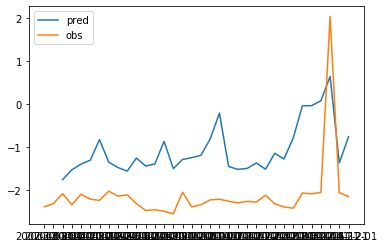

In [130]:
plt.plot(ndvi_ea_simplex_ed6_pi18[:-18][0].loc[read_ndvi_outlier_dates[0]], label = 'pred')
plt.plot(ndvi_anom_tableT[5:][0].loc[read_ndvi_outlier_dates[0]], label = 'obs')
plt.legend()

Text(0, 0.5, 'pred')

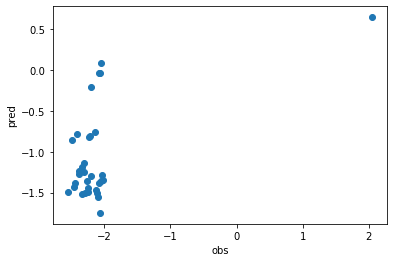

In [129]:
plt.scatter(ndvi_anom_tableT[5:][0].loc[read_ndvi_outlier_dates[0]],ndvi_ea_simplex_ed6_pi18[:-18][0].loc[read_ndvi_outlier_dates[0]])
plt.xlabel('obs')
plt.ylabel('pred')

In [114]:
out_test

,MAE,RMSE,rho
0,1.117831,1.211192,0.570949
1,1.442949,1.582299,0.820578
2,1.640788,1.816335,0.678902
3,1.602250,1.738787,0.741506
4,1.815671,2.003418,0.606057
5,1.663289,1.848326,0.716727
6,1.748202,1.926086,0.728207
7,1.881341,2.052486,0.668689
8,1.570808,1.796185,0.740580
9,0.991783,1.170784,0.668033


In [131]:
nonout_test

,MAE,RMSE,rho
0,0.523586,0.650301,0.678357
1,0.542665,0.673451,0.601272
2,0.607165,0.749809,0.531203
3,0.602041,0.740054,0.575743
4,0.671928,0.815914,0.471543
5,0.640201,0.789893,0.502904
6,0.591600,0.735343,0.544076
7,0.655832,0.805738,0.437630
8,0.593694,0.745468,0.576826
9,0.530491,0.664391,0.694771


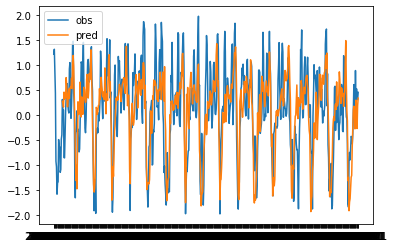

In [134]:
plt.plot(ndvi_anom_tableT[5:][0].drop(read_ndvi_outlier_dates[0],axis=0), label = 'obs')
plt.plot(ndvi_ea_simplex_ed6_pi18[:-18][0].drop(read_ndvi_outlier_dates[0],axis=0), label = 'pred')
plt.legend()

Text(0, 0.5, 'pred')

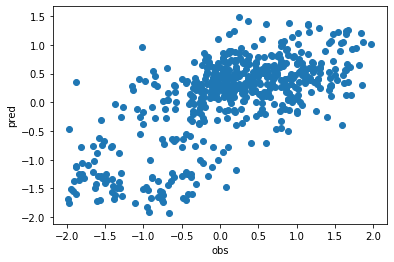

In [132]:
plt.scatter(ndvi_anom_tableT[5:][0].drop(read_ndvi_outlier_dates[0], axis=0),ndvi_ea_simplex_ed6_pi18[:-18][0].drop(read_ndvi_outlier_dates[0], axis=0))
plt.xlabel('obs')
plt.ylabel('pred')

In [113]:
out_test[out_test.MAE < 0.5]

,MAE,RMSE,rho


In [17]:
ndvi_anom_tableT[1505]

0     -1.633236
1     -1.438909
2     -0.831230
3     -0.450345
4     -0.229524
         ...   
601    0.049388
602    0.039310
603    0.182632
604    0.144556
605    0.052950
Name: 1505, Length: 606, dtype: float64

In [16]:
ndvi_ea_simplex_ed6_pi18[1505]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
614   NaN
615   NaN
616   NaN
617   NaN
618   NaN
Name: 1505, Length: 619, dtype: float64

In [54]:
ndvi_anom_tableT[1501].loc[[]]

Series([], Name: 1501, dtype: float64)

In [ ]:
ComputeError(list(ndvi_anom_tableT[1501].loc[[]]), list(ndvi_ea_simplex_ed6_pi18[1501].loc[[]]))

In [18]:
np.arange(1500,1510)

array([1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509])

In [ ]:
read_ndvi_outlier_dates[1505]

In [19]:
~ndvi_anom_tableT[392375].isnull().all()

True

In [20]:
ndvi_ea_simplex_ed6_pi18[392375]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
614   -1.277257
615   -0.971629
616   -0.582277
617   -1.073300
618   -0.273698
Name: 392375, Length: 619, dtype: float64

In [22]:
ComputeError(list(ndvi_anom_tableT[392375]),list(ndvi_ea_simplex_ed6_pi18[392375])) 

RuntimeError: ComputeError(): Observation size 606 is not equal to prediction size 619

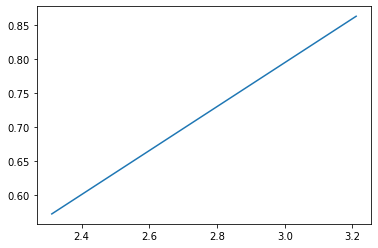

In [70]:
plt.plot(ndvi_anom_tableT[125].loc[read_ndvi_outlier_dates[125]], ndvi_ea_simplex_ed6_pi18[125].loc[read_ndvi_outlier_dates[125]])

In [69]:
stats.pearsonr(ndvi_anom_tableT[125].loc[read_ndvi_outlier_dates[125]], ndvi_ea_simplex_ed6_pi18[125].loc[read_ndvi_outlier_dates[125]])

(1.0, 1.0)

In [71]:
ndvi_anom_tableT[392592].loc[read_ndvi_outlier_dates[392592]]

135    2.095338
136    2.002925
Name: 392592, dtype: float64

In [72]:
ndvi_ea_simplex_ed6_pi18[392592].loc[read_ndvi_outlier_dates[392592]]

135    1.152576
136    1.025904
Name: 392592, dtype: float64

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt